<a href="https://colab.research.google.com/github/FrancesJay/FrancesJay/blob/main/Random_Forest_of_9891finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1BZNA99GmD7R_omqPPObx0gP2bd3Q2uHt/view?usp=sharing
id = "1BZNA99GmD7R_omqPPObx0gP2bd3Q2uHt"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('telecom_churn_data.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import Packages
import sys,joblib
import six
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Setup for tables and graphs
sns.set_context("talk", font_scale = 0.65, rc={"grid.linewidth": 5})
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 400)

In [ ]:
pip install fancyimpute

     |████████████████████████████████| 154 kB 11.9 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=285a4742a15b7434cda0557ac7efd644720ec292cd788a250a53403d2270d98f
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=0643d2889ad4051800b4327774bc0f1c181a8f29ae404ed82f98f37b6027d3af
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
# Model selection packages:
from sklearn.linear_model import LogisticRegression,LinearRegression,LassoCV,Lasso,Ridge,LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer
from scipy.stats import skew
#from fancyimpute import iterativeimputer
from fancyimpute import KNN
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [ ]:
import fancyimpute

## Data Preparation (99999 rows, 226 columns)


In [ ]:
df.shape

(99999, 226)

In [ ]:
print(df.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [ ]:
#Summary and checking outliers
df.describe(percentiles=[0.25,0.5,0.75,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [ ]:
#Function to check percentage of null values present in dataset 
def calnullpercentage(d): 
    missing_num= d[d.columns].isna().sum().sort_values(ascending=False) # 数据的每个column一共有多少missing value 排序
    missing_perc= (d[d.columns].isna().sum()/len(d)*100).sort_values(ascending=False) # percentage
    missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1) # 构建一个两列的数值和比例的dataframe
    missing= missing[missing['Percentage']>0] # 将有missing 的清理出来
    return missing

In [ ]:
#计算一共有多少column 是有missing value的
len(calnullpercentage(df))

166

In [ ]:
# column.dtype 看一下column的 categorical 和numerical
df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [ ]:
#Checking categorical and numerical columns 
s=df.select_dtypes(include='object')
s.shape # 一共有12栏categorical column

(99999, 12)

## filter out for high-value customers
We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 85th percentile of the average recharge amount in the first two months.

In [ ]:
# Deriving new columns for total recharge amount data for 6 and 7th month
df['tot_rech_amt_data_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['tot_rech_amt_data_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
# Deriving new columns for total amount spent during  6 and 7th month
df['tot_amt_6'] = df[['total_rech_amt_6','tot_rech_amt_data_6']].sum(axis=1)
df['tot_amt_7'] = df[['total_rech_amt_7','tot_rech_amt_data_7']].sum(axis=1)
#first two months average
df['avg_amt_6_7'] = df[['tot_amt_6','tot_amt_7']].mean(axis=1)

In [ ]:
#filter out
df=df.loc[(df['avg_amt_6_7'] >= np.percentile(df['avg_amt_6_7'], 85))]
df.shape

(15014, 231)

In [ ]:
# using the same idea to create the 8th and 9th mont column by merging
df['tot_rech_amt_data_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df['tot_rech_amt_data_9'] = df['total_rech_data_9'] * df['av_rech_amt_data_9']
# Deriving new columns for total amount spent during  8 and 9th month
df['tot_amt_8'] = df[['total_rech_amt_8','tot_rech_amt_data_8']].sum(axis=1)
df['tot_amt_9'] = df[['total_rech_amt_9','tot_rech_amt_data_9']].sum(axis=1)

In [ ]:
#Finding categorical columns where dtype is float but those columns are having 0 or 1 values only
catg= []
for col in df.columns:
    if len(df[col].unique())== 2 | 3:    #假设每个column unique的value只有2到3个 | 代表or
        catg.append(col)
# Converting into categorical or object type
df[catg]=df[catg].apply(lambda x:x.astype('object'))
col_tmp=['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_num_9','total_rech_data_6',\
        'total_rech_data_7','total_rech_data_8','total_rech_data_9']
df[col_tmp]=df[col_tmp].apply(lambda x:x.astype('object'))

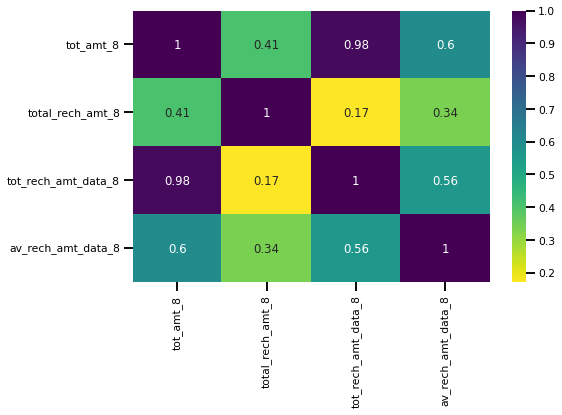

In [ ]:
x=['tot_amt_8','total_rech_amt_8','tot_rech_amt_data_8','total_rech_data_8','av_rech_amt_data_8']
plt.figure(figsize=(8,5))
sns.heatmap(df[x].corr(),annot=True,cmap='viridis_r')

In [ ]:
# drop redundant columns
df.drop(['tot_rech_amt_data_6','tot_rech_amt_data_7','tot_rech_amt_data_8','tot_rech_amt_data_9'],inplace=True,axis=1)

In [ ]:
df.shape

(15014, 231)

## Identifying churn customers


In [ ]:
# Where summation of columns = 0 then churn =1  else 0
df['churn']= np.where(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)== 0,1,0)

In [ ]:
df['churn']

7        1
33       0
48       0
53       0
56       0
        ..
99931    0
99941    0
99957    0
99986    0
99997    0
Name: churn, Length: 15014, dtype: int64

In [ ]:
# Removing all features having ‘ _9’, etc. in their names
df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1,inplace=True) #因为刚刚根据9月份的电话量计算出了churn 所以我们现在不需要这些column了

In [ ]:
## Churn Percentage
pd.DataFrame((df['churn'].value_counts(normalize=True)*100).round(2).astype('str')+'%') #看一下是否balance

,churn
0,92.17%
1,7.83%


In [ ]:
# build a function to filter out redundant features
def redundant_feature(t):
    redundant = []
    for i in t.columns:
        counts = t[i].value_counts() 
        count_max = counts.iloc[0] # 数一下0在每一列的数量
        if count_max / len(t) * 100 > 80:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [ ]:
df.shape

(15014, 176)

In [ ]:
print('Before dropping Redundant features: ',df.shape)
redundant_features = redundant_feature(df)
redundant_features = redundant_features[:-1]
df = df.drop(redundant_features, axis=1)
print('After dropping Redundant features: ',df.shape)

Before dropping Redundant features:  (15014, 176)
After dropping Redundant features:  (15014, 145)


In [ ]:
df.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_amt_6,tot_amt_7,avg_amt_6_7,tot_amt_8,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,31.64,23.74,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,60.86,75.14,77.84,4.50,0.00,6.50,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1580.0,790.0,1185.0,3638.0,1
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.56,1.75,0.56,2.45,0.00,0.00,37.93,1.73,0.31,0.16,3.48,0.88,40.54,0.00,2.91,0.05,2.95,1.78,0.86,0.23,0.96,0.13,3.18,5.66,1.04,7.89,7.19,41.79,0.00,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,1058,2806,455,252,1255,455,6/30/2014,7/30/2014,8/26/2014,252,0,455,6/30/2014,7/28/2014,8/26/2014,5,8,1,252.0,1255.0,455.0,0.0,0.0,0.0,5.0,8.0,1.0,1057.0,2553.0,455.0,87.05,57.76,7.97,3509.9,8154.65,7701.01,897.6,2294.03,405.26,931.58,2200.2,391.92,1,1,0,0,0,0,4,5,1,1,1,1,1328,358.10,2706.83,1714.67,6343.0,23230.0,14786.5,910.0,0
48,7000294396,1873.271,575.927,179.218,2061.69,881.43,156.91,1087.76,258.29,68.18,0.00,0.00,0.00,0.00,611.18,154.56,29.31,1012.04,188.83,65.58,19.34,3.68,0.80,0.06,0.0,0.00,1642.58,347.08,95.69,1450.51,726.86,127.59,56.29,65.36,1.79,1506.81,792.23,129.39,1.58,1.34,0.00,1.45,3152.43,1140.66,225.09,361.94,94.19,40.26,842.49,

In [ ]:
#Function to impute NaN with 0
def imputeNaN(t,col_name):
    for col in col_name:
        t[col].fillna(0,inplace=True)
col_40= calnullpercentage(df)[calnullpercentage(df)['Percentage']>40].index
#call function
imputeNaN(df,col_40)
calnullpercentage(df)

,Total,Percentage
arpu_3g_8,5253,34.987345
date_of_last_rech_data_8,5253,34.987345
count_rech_3g_8,5253,34.987345
arpu_2g_8,5253,34.987345
av_rech_amt_data_8,5253,34.987345
count_rech_2g_8,5253,34.987345
fb_user_8,5253,34.987345
max_rech_data_8,5253,34.987345
night_pck_user_8,5253,34.987345
total_rech_data_8,5253,34.987345


In [ ]:
pd.DataFrame((df[calnullpercentage(df).index]==0).sum()).head(15)

,0
arpu_3g_8,3188
date_of_last_rech_data_8,0
count_rech_3g_8,5166
arpu_2g_8,2360
av_rech_amt_data_8,0
count_rech_2g_8,2699
fb_user_8,768
max_rech_data_8,0
night_pck_user_8,9509
total_rech_data_8,0


In [ ]:
df['churn']

7        1
33       0
48       0
53       0
56       0
        ..
99931    0
99941    0
99957    0
99986    0
99997    0
Name: churn, Length: 15014, dtype: int64

In [ ]:
imput_col= list(set(calnullpercentage(df).index)-set(('date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_6')))
knn_imp =KNNImputer()
df[imput_col] = knn_imp.fit_transform(df[imput_col])

In [ ]:
calnullpercentage(df)

,Total,Percentage
date_of_last_rech_data_8,5253,34.987345
date_of_last_rech_data_6,4649,30.964433
date_of_last_rech_data_7,4461,29.712269
date_of_last_rech_8,245,1.631810
date_of_last_rech_7,27,0.179832
date_of_last_rech_6,23,0.153190


In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.shape

(15014, 145)

In [ ]:
df.drop('mobile_number',inplace=True,axis=1)

In [ ]:
df.shape

(15014, 144)

In [ ]:
#from google.colab import files

In [ ]:
#df.to_csv('telecom_churn_data_clean.csv')

In [ ]:
#files.download("telecom_churn_data_clean.csv")

## Data Visualization


In [ ]:
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9) 

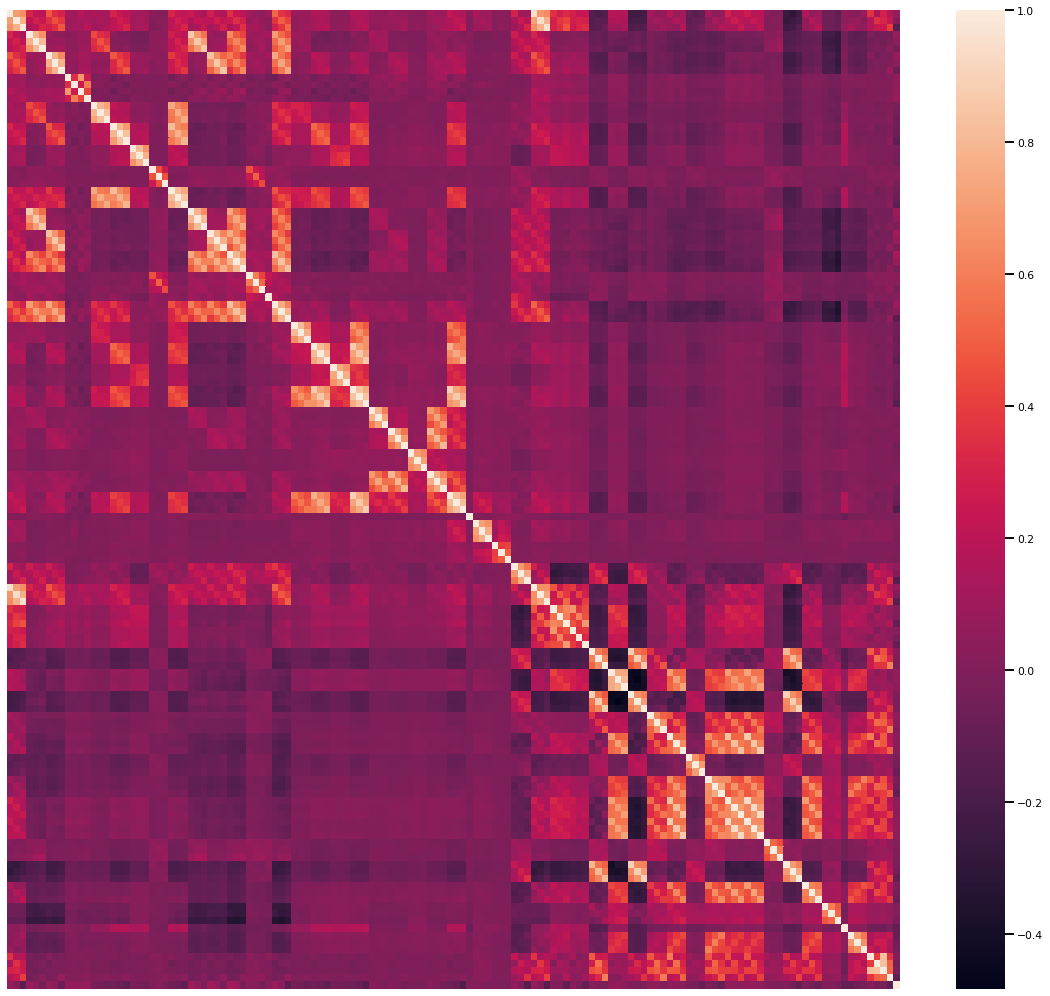

In [ ]:
plt.figure(figsize=(20,18))
ax=sns.heatmap(df.corr())
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

In [ ]:
def dist_box_plot(df,col1,col2,col3):    
     fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20, 4))
     ax = sns.distplot(df[df['churn']==1][col1], bins = 40, ax = axes[0], kde = False, color='#2980B9',hist_kws={"alpha": 1})
     ax.set_title('Churn',fontweight='bold',size=20)
     ax = sns.distplot(df[df['churn']==0][col1], bins = 40, ax = axes[1], kde = False, color='#E67E22',hist_kws={"alpha": 1})
     ax.set_title('Non-Churn',fontweight='bold',size=20)
     ax = sns.distplot(df[df['churn']==1][col2], bins = 40, ax = axes[2], kde = False, color='#2980B9',hist_kws={"alpha": 1})
     ax.set_title('Churn',fontweight='bold',size=20)
     ax = sns.distplot(df[df['churn']==0][col2], bins = 40, ax = axes[3], kde = False, color='#E67E22',hist_kws={"alpha": 1})
     ax.set_title('Non-Churn',fontweight='bold',size=20)
     fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
     ax=sns.boxplot(x='churn', y=col1, data=df,ax=axes[0])
     ax=sns.stripplot(x='churn', y=col1, data=df, jitter=True, edgecolor="gray",ax=axes[0])
     ax.yaxis.label.set_visible(False)
     ax.set_title(col1,fontweight='bold',size=20)
     ax=sns.boxplot(x='churn', y=col2, data=df,ax=axes[1])
     ax=sns.stripplot(x='churn', y=col2, data=df, jitter=True, edgecolor="gray",ax=axes[1])
     ax.yaxis.label.set_visible(False)
     ax.set_title(col2,fontweight='bold',size=20)
     fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 4))
     ax = sns.distplot(df[df['churn']==1][col3], bins = 40, ax = axes[0], kde = False, color='#2980B9',hist_kws={"alpha": 1})
     ax.set_title('Churn',fontweight='bold',size=20)
     ax = sns.distplot(df[df['churn']==0][col3],bins=40, ax = axes[1], kde = False, color='#E67E22',hist_kws={"alpha": 1})
     ax.set_title('Non-Churn',fontweight='bold',size=20)
     ax=sns.boxplot(x='churn', y=col3, data=df,ax=axes[2])
     ax=sns.stripplot(x='churn', y=col3, data=df, jitter=True, edgecolor="gray",ax=axes[2])
     ax.yaxis.label.set_visible(False)
     ax.set_title(col3,fontweight='bold',size=20)
     plt.show()

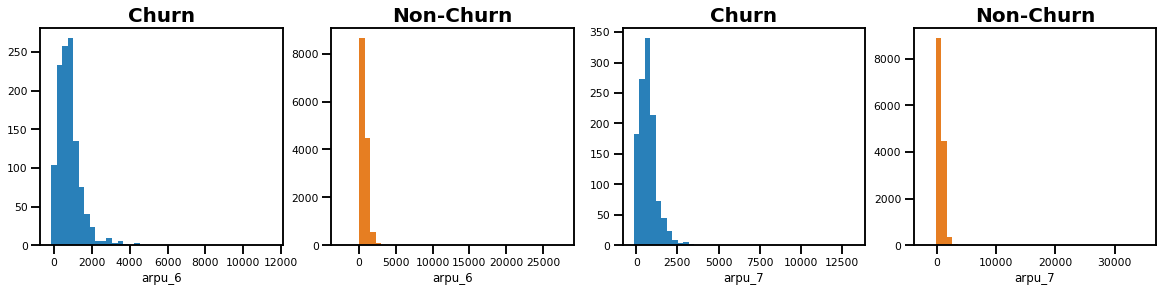

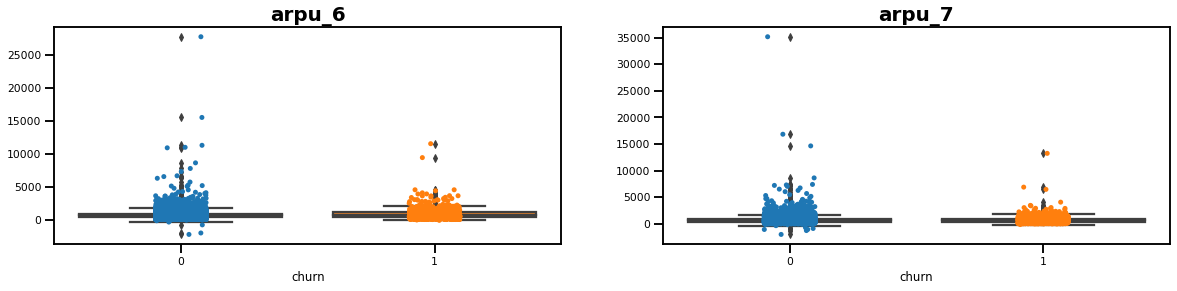

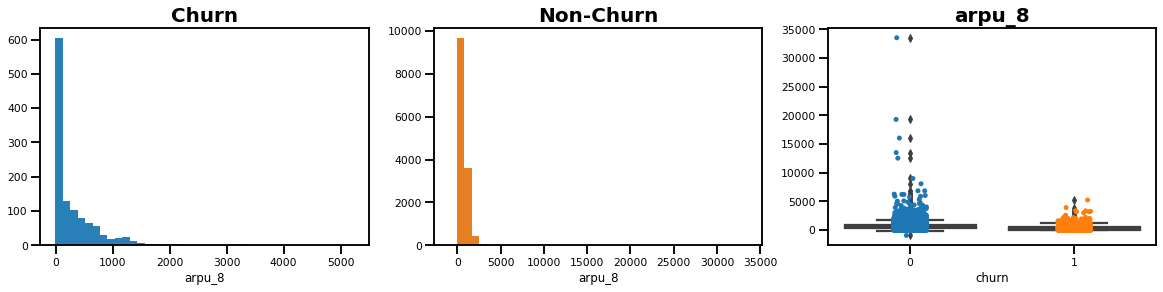

In [ ]:
dist_box_plot(df,'arpu_6','arpu_7','arpu_8')

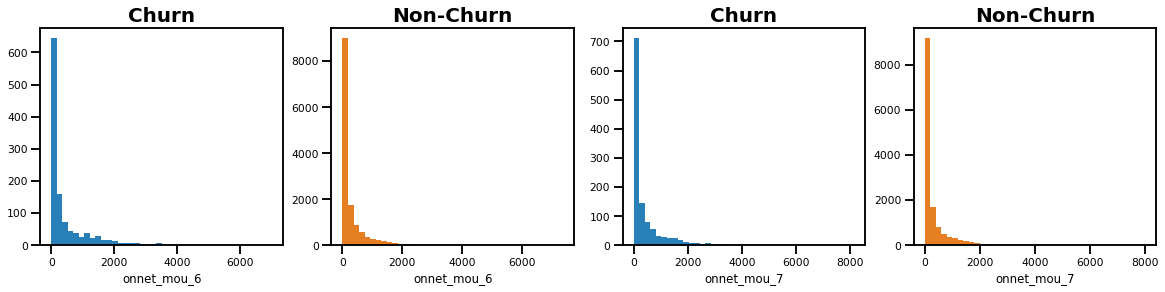

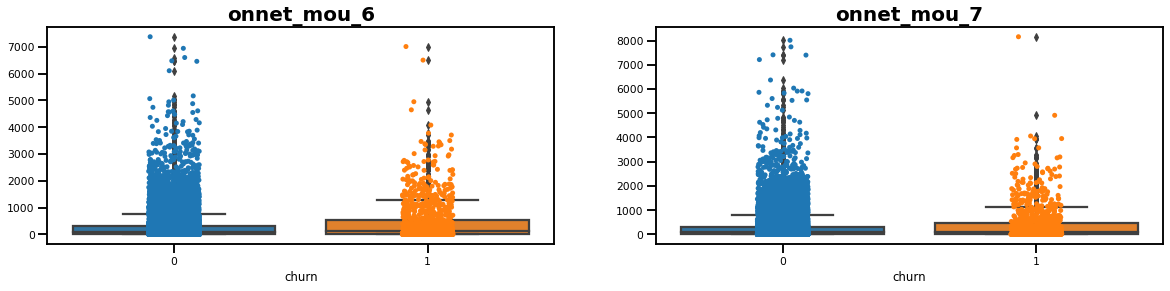

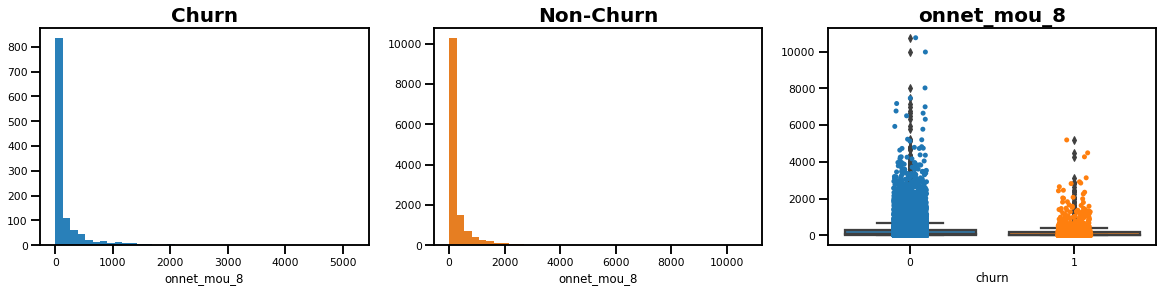

In [ ]:
dist_box_plot(df,'onnet_mou_6','onnet_mou_7','onnet_mou_8')

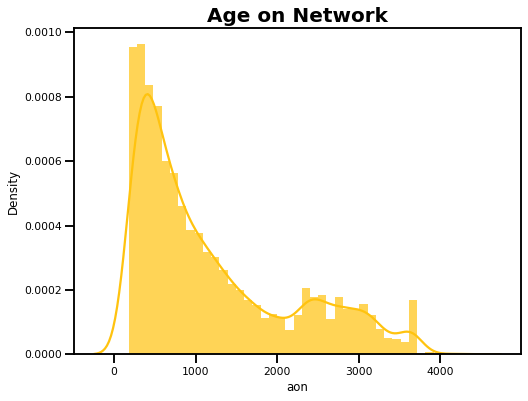

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.distplot(df['aon'],color='#FFC30F',hist_kws={"alpha": 0.7})
ax.set_title('Age on Network',fontweight='bold',size=20)
plt.show()

##Categorical Variables


## Prep Data

In [ ]:
for i in range(6,9):
    df['tot_og_to_ic_mou_'+str(i)] = (df['total_og_mou_'+str(i)])/(df['total_ic_mou_'+str(i)]+1)

In [ ]:
for i in range(6,9):
    df['loc_og_to_ic_mou_'+str(i)] = (df['loc_og_mou_'+str(i)])/(df['loc_ic_mou_'+str(i)]+1)

In [ ]:
def plot_Churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(telecom.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

In [ ]:
for i in range(6,9):
    df['total_vol_'+str(i)] = (df['vol_2g_mb_'+str(i)])+(df['vol_3g_mb_'+str(i)])

In [ ]:
for i in range(6,9):
    df['total_arpu_'+str(i)] = (df['arpu_3g_'+str(i)])+(df['arpu_3g_'+str(i)])

In [ ]:
date_cols=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
for col in date_cols:
    df[col] = pd.to_datetime(df[col],format='%m/%d/%Y',errors='coerce')

In [ ]:
df['date_of_last_rech_dow_6'] = df['date_of_last_rech_6'].dt.dayofweek.astype(str)
df['date_of_last_rech_dow_7'] = df['date_of_last_rech_7'].dt.dayofweek.astype(str)
df['date_of_last_rech_dow_8'] = df['date_of_last_rech_8'].dt.dayofweek.astype(str)
df['date_of_last_rech_data_dow_6'] = df['date_of_last_rech_data_6'].dt.dayofweek.fillna(7).astype(int).astype(str)
df['date_of_last_rech_data_dow_7'] = df['date_of_last_rech_data_7'].dt.dayofweek.fillna(7).astype(int).astype(str)
df['date_of_last_rech_data_dow_8'] = df['date_of_last_rech_data_8'].dt.dayofweek.fillna(7).astype(int).astype(str)

In [ ]:
# recent recharge date 
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df['last_rech_date'] = df[cols].max(axis=1)
# number of days from  the recent charge date till last date of Aug/8th month
df['days_since_last_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - df['last_rech_date'] ).astype('timedelta64[D]'))
# subtract it from 3 to add higher weightage for values present in all the columns. 
# len(cols) = 3,  means present in all columns, 0 means not present in any column
df['rech_weightage'] = len(cols) - (df[cols].isnull().sum(axis=1))
df.drop(['last_rech_date','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)


In [ ]:
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
df['last_rech_data_date'] = df[cols].max(axis=1)
# number of days from  the recent charge date till last date of Aug/8th month
df['days_since_last_data_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - df['last_rech_data_date'] ).astype('timedelta64[D]'))
df['days_since_last_data_rech'] = df['days_since_last_data_rech'].fillna(0)
# subtract it from 3 to add higher weightage for values present in all the columns. 
# len(cols) = 3,  means present in all columns, 0 means not present in any column
df['rech_data_weightage'] = len(cols) - (df[cols].isnull().sum(axis=1))
df.drop(['last_rech_data_date','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)

In [ ]:
catg =['night_pck_user_6','sachet_2g_6','monthly_3g_6','fb_user_6','night_pck_user_7','sachet_2g_7','monthly_3g_7','fb_user_7',\
       'date_of_last_rech_dow_6','date_of_last_rech_dow_7','date_of_last_rech_data_dow_6','date_of_last_rech_data_dow_7','date_of_last_rech_dow_8','date_of_last_rech_data_dow_8','night_pck_user_8','sachet_2g_8',\
       'monthly_3g_8','fb_user_8']
catg1 =['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7', 'date_of_last_rech_dow_6','date_of_last_rech_dow_7','date_of_last_rech_data_dow_6','date_of_last_rech_data_dow_7',\
       'date_of_last_rech_dow_8','date_of_last_rech_data_dow_8','night_pck_user_8','monthly_2g_8','sachet_2g_8', 'monthly_3g_8','sachet_3g_8','fb_user_8']
num_col = list(set(df.columns).difference(set(catg)))

In [ ]:
col_list1 = df.select_dtypes(include=['float64','int64']).filter(regex='avg67_').columns
col_list2 = df.select_dtypes(include=['float64', 'int64']).filter(regex='_8').drop(['fb_user_8','night_pck_user_8'],axis=1).columns
for col1,col2 in zip(col_list1,col_list2):
    col_name=col2[:-2]+'_avgdiff8'
    df[col_name]=df[col2]-df[col1]

In [ ]:
catg
dummy_df=pd.get_dummies(df[catg],drop_first=True)
df=pd.concat([df,dummy_df],axis=1)
df= df.drop(catg,axis=1)

In [ ]:
telecom_numerical=df[num_col]
skew_features = telecom_numerical.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
pd.DataFrame(skew_features,columns=['Skewness']).head(10)

,Skewness
loc_og_to_ic_mou_7,64.838775
loc_og_to_ic_mou_6,60.008101
loc_og_to_ic_mou_8,51.303643
spl_ic_mou_6,48.962370
tot_og_to_ic_mou_8,48.200787
tot_og_to_ic_mou_7,37.612682
tot_og_to_ic_mou_6,35.607684
std_ic_t2f_mou_8,35.293823
ic_others_6,32.668658
std_ic_t2f_mou_6,31.164823


In [ ]:
num_col.remove('churn')
qntle_trnsfrm=QuantileTransformer()
df[num_col]= qntle_trnsfrm.fit_transform(df[num_col])

In [ ]:
df.shape

(15014, 184)

## Project:

In [ ]:
X=df.drop('churn', axis=1)
y=df['churn']
random_state=42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
print(X_train.shape)
print(X_test.shape)

(13512, 183)
(1502, 183)


In [ ]:
#functions to plot accuracy 
def model_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    TP=confusion[1,1] #True positives
    TN= confusion[0,0] #True Negatives
    FP=confusion[0,1] #False Positives
    FN= confusion[1,0] #False Negatives
    acc_score = round(accuracy_score(actual, predicted),2) #accuracy score
    rcl_score=round(recall_score(actual, predicted),2) #recall score
    roc_score = round(roc_auc_score(actual, predicted),2) # roc_auc score
    fpr = round(FP/float(TN+FP),2) #False Positive Ration
    specificity = round(TN/float(TN+FP),2) #False Positive Ration

In [ ]:
# Function to predict class labels based on model predicted probabilty and cutoff/threshold for assigning labels
def predictChurnlabeloncutoff(model,X,y,threshold=0.5):
    pred_probs = model.predict_proba(X)[:,1]
    pred_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>threshold else 0
    pred_df['predicted'] = pred_df.churn_Prob.map( lambda x: 1 if x > threshold else 0)
    return pred_df

In [ ]:
def optimal_cutoff(elem):
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        elem[i] = elem.churn_Prob.map( lambda x: 1 if x > i else 0)
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','specificity'])
    from sklearn.metrics import confusion_matrix

    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
         cm1 = confusion_matrix(elem.churn, elem[i] )
         total1=sum(sum(cm1))
         accuracy = (cm1[0,0]+cm1[1,1])/total1

         speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
         sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
         cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    cutoff_df.plot.line(x='prob', y=['accuracy','recall','specificity'],figsize=(8,6))
    plt.show()

## Modeling


In [ ]:
# Naive Bayes
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_test_pred=gnb.predict(X_test)
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1388
           1       0.34      0.61      0.44       114

    accuracy                           0.88      1502
   macro avg       0.65      0.76      0.69      1502
weighted avg       0.92      0.88      0.90      1502

Confusion Matrix:

[[1254  134]
 [  44   70]]


In [ ]:
#logistic
log_reg= LogisticRegression(random_state=random_state,class_weight='balanced')
log_reg.fit(X_train,y_train) #fitting model
y_test_pred=log_reg.predict(X_test) #model prediction
print(classification_report(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1388
           1       0.35      0.76      0.48       114

    accuracy                           0.88      1502
   macro avg       0.67      0.82      0.71      1502
weighted avg       0.93      0.88      0.90      1502



In [ ]:
#Tuned
fold=StratifiedKFold(random_state=random_state,shuffle=True,n_splits=10)

In [ ]:
params={'penalty':['l1'],'C':list(np.power(10.0, np.arange(-2, 3))),'solver':('saga','liblinear'),'class_weight':['balanced']}
#we are using scoring metrics Recall
log_regcv=GridSearchCV(LogisticRegression(random_state=random_state,max_iter=1000),param_grid=params,cv=fold,scoring='recall',verbose=1,return_train_score=True)
log_regcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_weight': ['balanced'], 'penalty': ['l1'],
                         'solver': ('saga', 'liblinear')},
             return_train_score=True, scoring='recall', verbose=1)

In [ ]:
print(log_regcv.best_params_)
print(log_regcv.best_score_)
print(log_regcv.best_estimator_)
# test set prediction using tuned model
log_regcv=log_regcv.best_estimator_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
0.8453976371010403
LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')


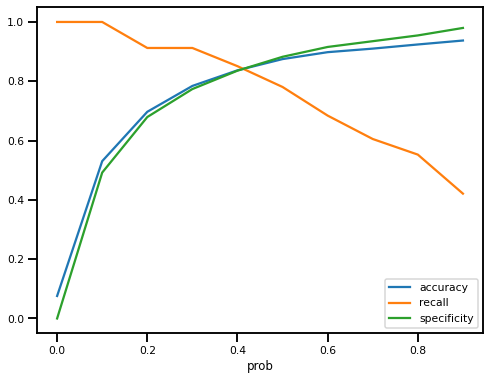

In [ ]:
log_regcv.fit(X_train,y_train) #fitting best models
df_cutoff=predictChurnlabeloncutoff(log_regcv,X_test,y_test)
optimal_cutoff(df_cutoff)

In [ ]:
threshold=0.4 # from the above graph(recall, accuracy and specificity have good score)
y_test_pred= predictChurnlabeloncutoff(log_regcv,X_test,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.84      0.90      1388
           1       0.30      0.85      0.44       114

    accuracy                           0.84      1502
   macro avg       0.64      0.84      0.67      1502
weighted avg       0.93      0.84      0.87      1502

Confusion Matrix:

[[1160  228]
 [  17   97]]


## Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=random_state)
rfc.fit(X_train,y_train)
y_test_pred= rfc.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))

[[1374   14]
 [  70   44]]


In [ ]:
def model_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    TP=confusion[1,1] #True positives
    TN= confusion[0,0] #True Negatives
    FP=confusion[0,1] #False Positives
    FN= confusion[1,0] #False Negatives
    acc_score = round(accuracy_score(actual, predicted),2) #accuracy score
    rcl_score=round(recall_score(actual, predicted),2) #recall score
    roc_score = round(roc_auc_score(actual, predicted),2) # roc_auc score
    fpr = round(FP/float(TN+FP),2) #False Positive Ration
    specificity = round(TN/float(TN+FP),2) #False Positive Ration
    metrics_df = pd.DataFrame(data=[[acc_score,roc_score,fpr,\
                                     specificity,rcl_score,TP,\
                                     TN,FP,FN,]],columns=['accuracy','roc_auc','fpr','specificity','recall_score',\
                                                          'true_positive','true_negative',\
                                                          'false_positive','false_negative'],index=['score'])
    return metrics_df


In [ ]:
model_metrics(y_test,y_test_pred)

,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.94,0.69,0.01,0.99,0.39,44,1374,14,70
